# Fc1 and Fc2

Interpretation of the eigendirections? :) 
 
Directions in data? 

Direction of frequent tokens? directions of unfrequent tokens? 

Dark subspace? 

Relevant papers:

Dark signals

Frequency of tokens make outliers

outliers and attention sinks


In [1]:
from functions import * 
LLM = 'OPT'
layer_idx = 27
f = 'fc2'
dt = np.float32

resultsfolder = get_weights_folder(LLM,layer_idx,layer_name=f)
eigenvalues = np.loadtxt(fname=resultsfolder + 'eigenvalues.txt',dtype=dt)
eigenvectors= np.loadtxt(fname=resultsfolder + 'eigenvectors.txt',dtype=dt)

f='fc2'
eig_id=0: f_spikes[eig_id_aux]=array([ 639,  665, 1039, 1316, 1347, 1666, 1978, 2394, 2550, 2972, 3205,
       3742, 4085])
eig_id=2048: f_spikes[eig_id_aux]=array([ 131,  300,  312,  556,  633, 1051, 1053, 1237, 1254, 1354, 1715,
       3788])
eig_id=4095: f_spikes[eig_id_aux]=array([1347, 2394])


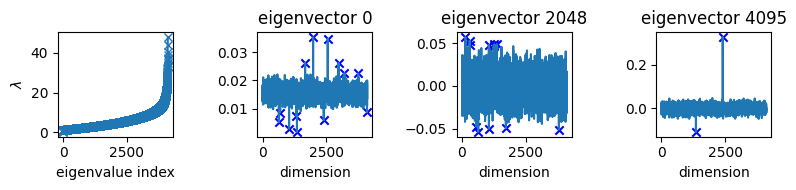

In [2]:
figsfolder = f'results/figs/spectrum/'
os.makedirs(figsfolder,exist_ok=True)

eig_ids = [0,eigenvalues.shape[0]//2,eigenvalues.shape[0]-1]
fig,axs = plt.subplots(1,len(eig_ids)+1,figsize=(8,2))
print(f'{f=}')

axs[0].plot(eigenvalues.real,'x-')
axs[0].set_ylabel(r'$\lambda$')
axs[0].set_xlabel('eigenvalue index')

f_spikes = []
for eig_id_aux,eig_id in enumerate(eig_ids):
  axs[eig_id_aux+1].plot(eigenvectors[:,eig_id],label=f'{eig_id=}')
  f_spikes.append(find_spikes(eigenvectors[:,eig_id]))
  axs[eig_id_aux+1].set_title(f'eigenvector {eig_id}')
  axs[eig_id_aux+1].scatter(f_spikes[eig_id_aux],eigenvectors[f_spikes[eig_id_aux],eig_id],color='blue',marker='x')
  print(f'{eig_id=}: {f_spikes[eig_id_aux]=}')
  axs[eig_id_aux+1].set_xlabel('dimension')

# fig.suptitle(f'{layer_idx=},layer_name={f}')
plt.tight_layout()
plt.savefig(f'{figsfolder}{LLM}_layer{layer_idx}_{f}_weights.pdf')
plt.show()

# f='fc2'
# eig_id=0: spikes=array([1666, 1978, 2550, 2972])
# eig_id=-1: spikes=array([1347, 2394])

# f='fc1'
# eig_id=0: spikes=array([1666, 1978, 2550, 2972, 3136])
# eig_id=-1: spikes=array([], dtype=int64)

### Bias

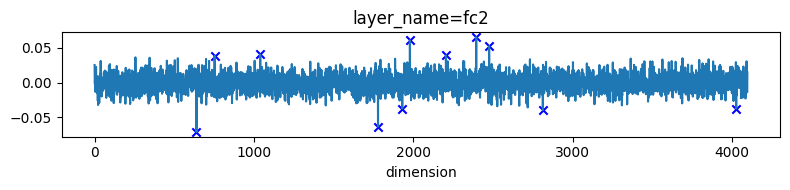

In [3]:
f_list = ['fc2']
fig, axs = plt.subplots(1,1,figsize=(8,2))

for f_id,f_aux in enumerate(f_list):
  resultsfolder = get_weights_folder(LLM,layer_idx,layer_name=f_aux)
  bias = np.loadtxt(fname=resultsfolder + 'bias.txt',dtype=dt)
  axs.plot(bias)
  bias_spikes = find_spikes(bias)
  axs.scatter(bias_spikes,bias[bias_spikes],color='blue',marker='x')
  axs.set_title(f'layer_name={f_aux}')
  axs.set_xlabel('dimension')
# fig.suptitle(f'{layer_idx=}')
plt.tight_layout()
plt.savefig(f'{figsfolder}{LLM}_layer{layer_idx}_{f}_bias.pdf')
plt.show()

## Token spikes in embedding matrix

In [4]:
model,config,tokenizer = get_model(LLM)
embedding_matrix = model.base_model.decoder.embed_tokens.weight.detach().numpy()
embedding_dim = embedding_matrix.shape[1]
print(f'{embedding_matrix.shape=}')

/leonardo/home/userexternal/sacevedo/venv/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
Loading checkpoint shards: 100%|██████████| 2/2 [00:35<00:00, 17.56s/it]


embedding_matrix.shape=(50272, 4096)


### Most frequent tokens

In [5]:
token_list = [0,5]
x_decoded = tokenizer.batch_decode(token_list,
                                  # skip_special_tokens=False,
                                  )
x_decoded

['<s>', ' the']

spike_list=array([  62,   99,  104,  155,  304,  314,  348,  390,  434,  639,  665,
        780,  811,  995, 1039, 1347, 1394, 1411, 1495, 1732, 2246, 2365,
       2394, 2483, 2529, 2582, 2685, 2717, 2749, 2851, 2892, 3239, 3444,
       3897, 4069])


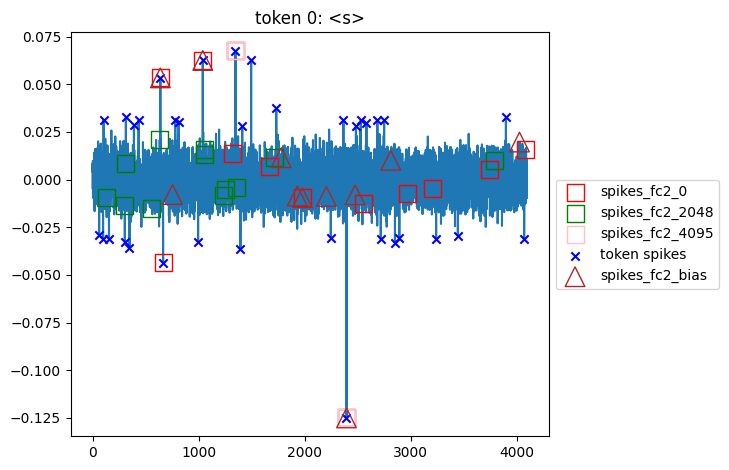

spike_list=array([ 491, 3109, 3177, 3236, 4079])


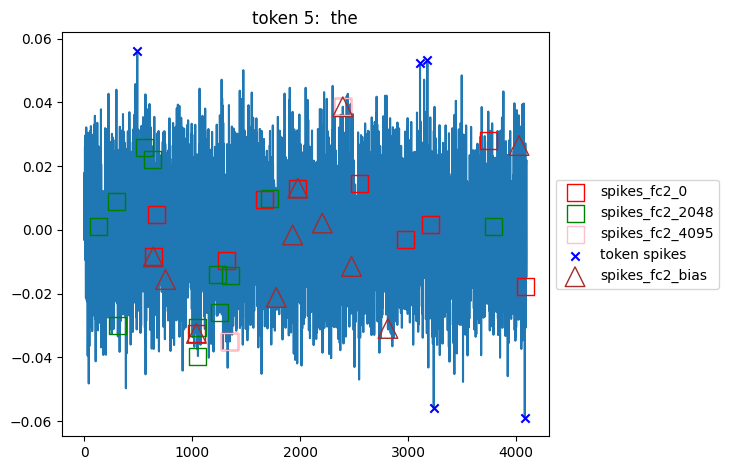

In [6]:
figsfolder = f'results/figs/embedding/'
os.makedirs(figsfolder,exist_ok=True)
colors_f_weights = ['red','green','pink']
frequent_tokens_spikes = []
for t_id,t in enumerate(token_list):
  spike_list = find_spikes(embedding_matrix[t])
  frequent_tokens_spikes.append(spike_list)
  if len(spike_list) != 0:
    fig,ax = plt.subplots()
    plt.plot(embedding_matrix[t],zorder=0)
    for eig_id_aux,eig_id in enumerate(eig_ids):
      plt.scatter(f_spikes[eig_id_aux],
                  embedding_matrix[t,f_spikes[eig_id_aux]],
                  marker='s',
                  color='red',
                  label=f'spikes_{f}_{eig_id}',
                  edgecolor=colors_f_weights[eig_id_aux],
                  facecolor='None',
                  s=150,
                  )
    plt.scatter(spike_list,embedding_matrix[t,spike_list],marker='x',color='blue',label=f'token spikes')
    if f=='fc2':
      plt.scatter(bias_spikes,embedding_matrix[t,bias_spikes],edgecolor='brown',label=f'spikes_fc2_bias',facecolor='None',s=200,marker='^')
    plt.title(f'token {t}: {x_decoded[t_id]}')
    plt.legend()
    box = ax.get_position()
    ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])
    ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
    print(f'{spike_list=}')
    plt.tight_layout()
    fig.savefig(f'{figsfolder}{LLM}_layer{layer_idx}_{t}.pdf',bbox_inches='tight')
    plt.show()

weights.sum()=1.0000001017772975


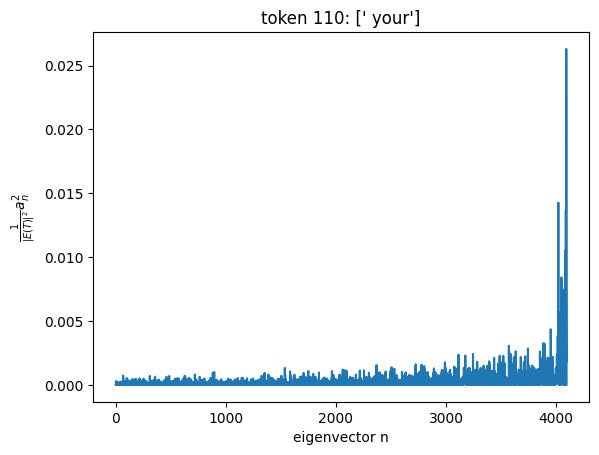

In [162]:
t = 110
overlaps = np.zeros(shape=(embedding_dim))
for n in range(embedding_dim):
  overlaps[n] = np.dot(embedding_matrix[t],eigenvectors[:,n])
weights = overlaps**2 / np.dot(embedding_matrix[t],embedding_matrix[t])
# weights = overlaps / np.sqrt(np.dot(embedding_matrix[t],embedding_matrix[t]))
print(f'{weights.sum()=}')
cutoff = embedding_dim // 20
# print(f'{np.sum(weights[:cutoff])=}')
# print(f'{np.sum(weights[-cutoff:])=}')
fig,ax = plt.subplots(1)
plt.title(f'token {t}: {tokenizer.batch_decode([t])}')
ax.set_ylabel(r'$\frac{1}{|E(T)|^2} a_n^2$')
ax.set_xlabel(f'eigenvector n')
plt.plot(weights[:])
plt.show()

In [151]:
cutoff =  200 # embedding_dim // 20
token_list = np.arange(10,dtype=int)
token_list = np.concatenate((token_list,
                             np.arange(10,100,2))
)
token_list = np.concatenate((token_list,
                             np.arange(100,1000,100))
)
token_list = np.concatenate((token_list,
                             np.arange(1000,10000,1000))
)
token_list = np.concatenate((token_list,
                             np.array([2,3,4,5])*10000)
)


weight_on_min_subspace = np.empty(shape=(len(token_list)))
weight_on_max_subspace = np.empty(shape=weight_on_min_subspace.shape)
weight_on_middle_subspace = np.empty(shape=weight_on_min_subspace.shape)

for t_id,t in enumerate(token_list):
  overlaps = np.zeros(shape=(embedding_dim))  
  for n in range(embedding_dim):
    overlaps[n] = np.dot(embedding_matrix[t],eigenvectors[:,n])
  weights = overlaps**2 / np.dot(embedding_matrix[t],embedding_matrix[t])
  weight_on_min_subspace[t_id] = np.sum(weights[:cutoff])
  weight_on_max_subspace[t_id] = np.sum(weights[-cutoff:])
  weight_on_middle_subspace[t_id] = np.sum(weights[(embedding_dim-cutoff)//2:(embedding_dim+cutoff)//2])

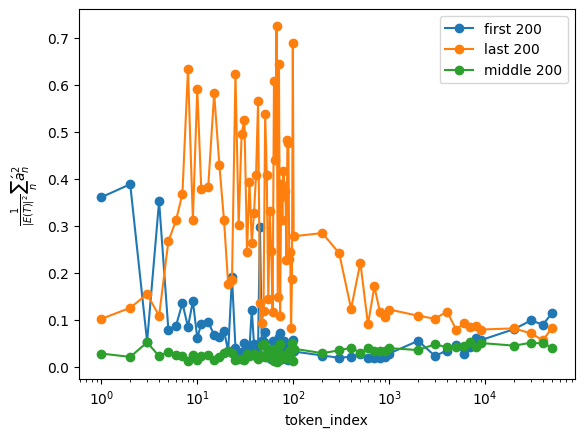

In [163]:
fig,ax = plt.subplots(1)
plt.plot(token_list+1,weight_on_min_subspace,'o-',label='first 200')
plt.plot(token_list+1,weight_on_max_subspace,'o-',label='last 200')
plt.plot(token_list+1,weight_on_middle_subspace,'o-',label='middle 200')
ax.set_xscale('log')
ax.set_ylabel(r'$\frac{1}{|E(T)|^2}\sum_n\' a_n^2$')
ax.set_xlabel(f'token_index')
ax.legend()
# plt.hlines(1/embedding_dim,1,embedding_matrix.shape[0])
plt.show()

### Other tokens

In [72]:
N_tokens = 10
gap = 1000
token_list = np.arange(tokenizer.vocab_size-gap,tokenizer.vocab_size-N_tokens-gap,-1)
x_decoded = tokenizer.batch_decode(token_list,
                                  skip_special_tokens=False)
x_decoded

[' phyl',
 '�',
 ' �',
 'Folder',
 ' artif',
 'あ',
 ' Elven',
 '++++++++++++++++',
 '方',
 'uliffe']

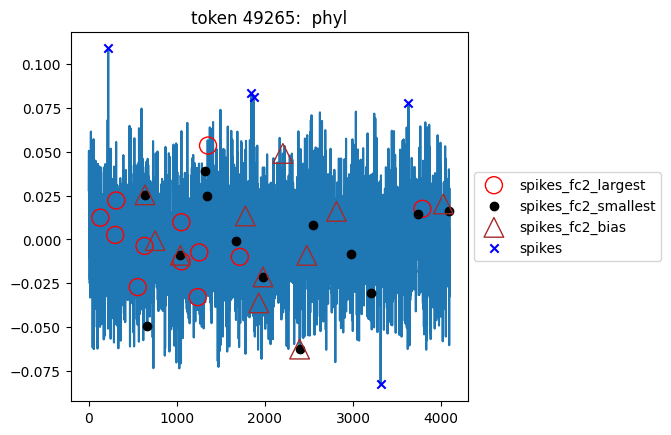

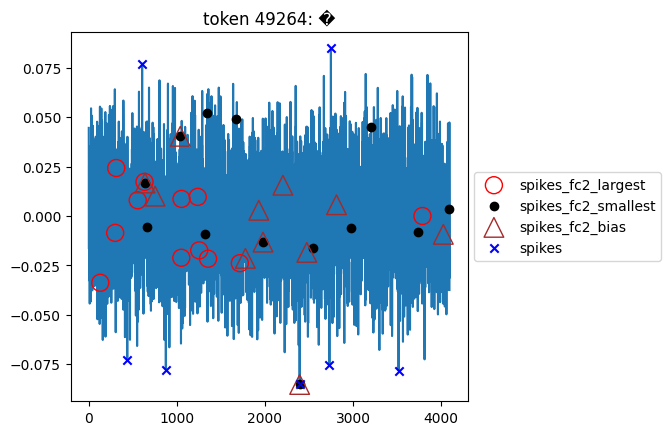

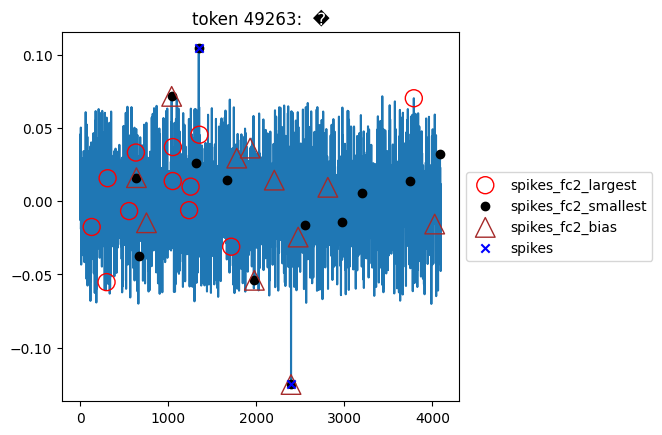

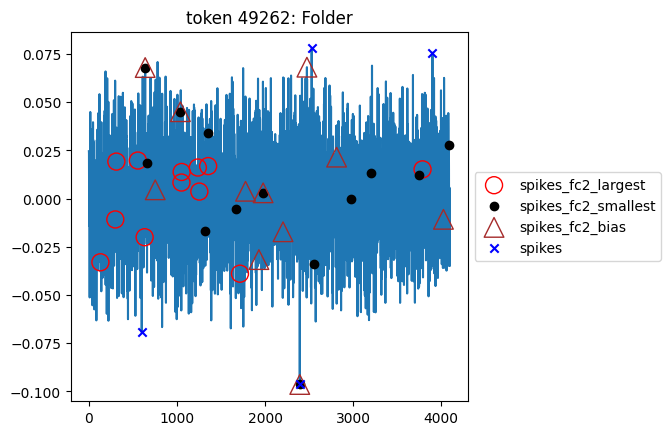

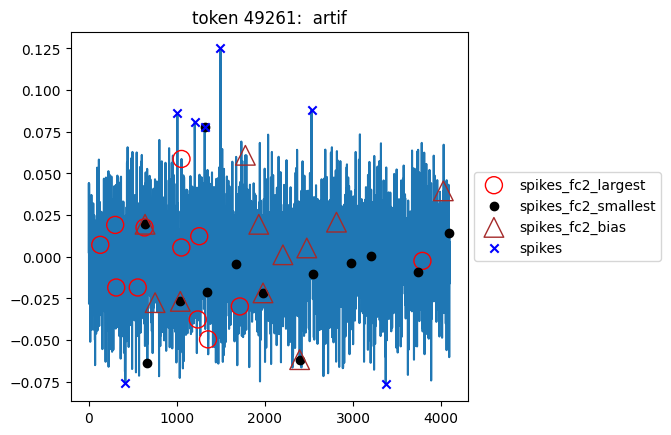

/leonardo/home/userexternal/sacevedo/venv/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 12354 (\N{HIRAGANA LETTER A}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


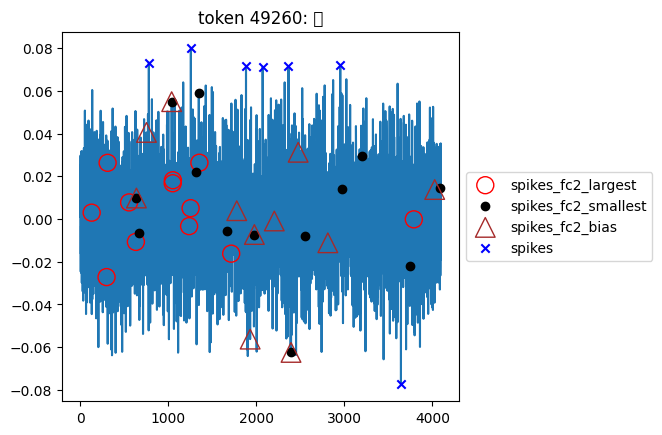

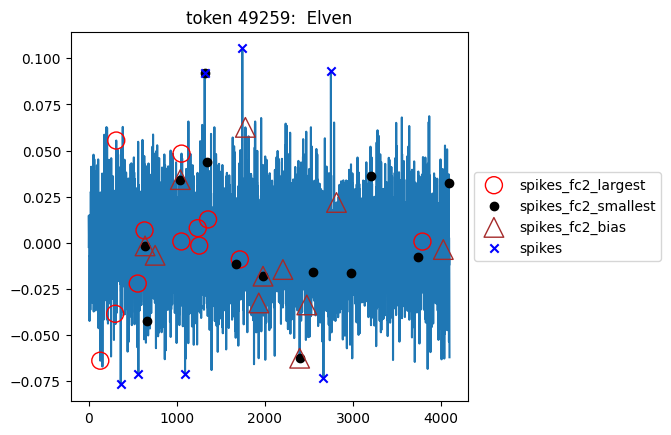

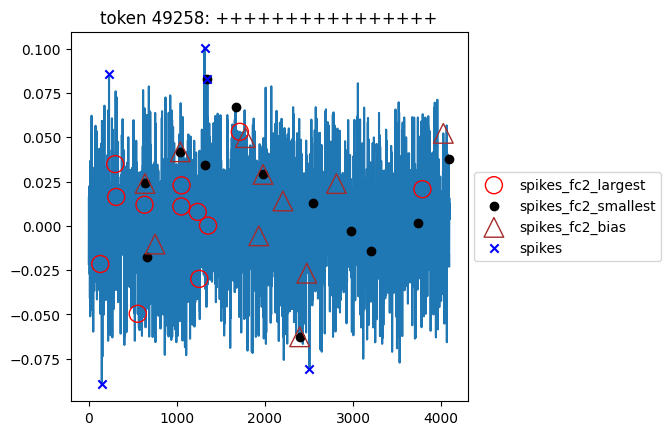

/leonardo/home/userexternal/sacevedo/venv/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 26041 (\N{CJK UNIFIED IDEOGRAPH-65B9}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


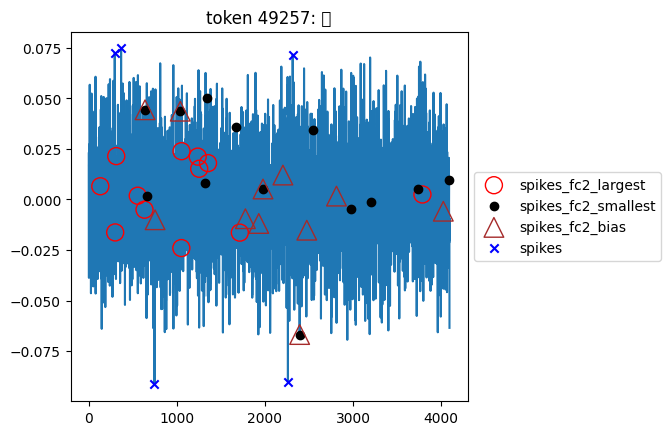

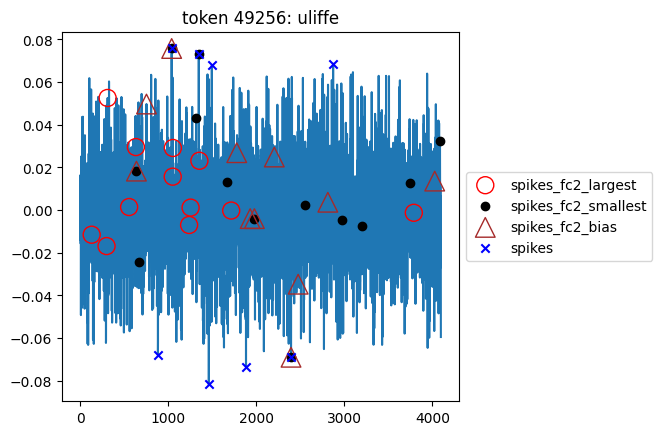

[array([ 221, 1843, 1871, 3313, 3629]), array([ 437,  606,  875, 2394, 2732, 2749, 3517]), array([1347, 2394]), array([ 600, 2394, 2529, 3900]), array([ 415, 1006, 1203, 1316, 1495, 2529, 3371]), array([ 780, 1257, 1883, 2072, 2365, 2953, 3642]), array([ 363,  563, 1093, 1316, 1743, 2664, 2749]), array([ 148,  230, 1314, 1347, 2505]), array([ 295,  367,  746, 2261, 2315]), array([ 883, 1039, 1347, 1461, 1495, 1883, 2394, 2872])]


In [73]:
least_frequent_tokens_spikes = []
for t_id,t in enumerate(token_list):
  spike_list = find_spikes(embedding_matrix[t])
  least_frequent_tokens_spikes.append(spike_list)
  if len(spike_list) != 0:
    fig,ax = plt.subplots(1)
    plt.plot(embedding_matrix[t],zorder=0)
    if len(f_spikes[1] != 0):
      plt.scatter(f_spikes[1],embedding_matrix[t,f_spikes[1]],color='red',label=f'spikes_{f}_largest',facecolor='None',edgecolor='red',s=150)
    if len(f_spikes[0] != 0):
      plt.scatter(f_spikes[0],embedding_matrix[t,f_spikes[0]],color='black',label=f'spikes_{f}_smallest')
    if f=='fc2':
      plt.scatter(bias_spikes,embedding_matrix[t,bias_spikes],edgecolor='brown',label=f'spikes_fc2_bias',facecolor='None',s=200,marker='^')
    plt.scatter(spike_list,embedding_matrix[t,spike_list],marker='x',color='blue',label=f'spikes')
    plt.title(f'token {t}: {x_decoded[t_id]}')
    box = ax.get_position()
    ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])
    ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
    plt.show()
print(least_frequent_tokens_spikes)

# F = F2.F1

In [45]:
from functions import * 
LLM = 'OPT'
layer_idx = 27
dt = np.complex_
f = 'f'
resultsfolder = get_weights_folder(LLM,layer_idx,layer_name=f)
eigenvalues = np.loadtxt(fname=resultsfolder + 'eigenvalues.txt',dtype=dt)
eigenvectors= np.loadtxt(fname=resultsfolder + 'eigenvectors.txt',dtype=dt)

In [ ]:
plt.plot(eigenvalues.real,eigenvalues.imag,'x-')

In [ ]:
fig,(ax1,ax2) = plt.subplots(1,2,figsize=(10,4))

ax1.hist(eigenvalues.real,bins=50,alpha=1,density=True);
ax2.hist(eigenvalues.imag,bins=50,alpha=1,density=True);
plt.show()

# Q K V 

In [ ]:
asd

In [ ]:

# print(f'{l.self_attn=}')
# Q = output[7]['Q']
# K = output[7]['K']
V = output[23]['V']
print(f'{V.shape=}')
X = []
lambdas = []
eigvs = []
# hs = range(num_heads//2)
# hs = range(num_heads//2,num_heads)
hs = range(num_heads)
for h_idx,h in enumerate(hs):
  print(f'{h=}')
  X.append(np.tensordot(V[h,:,:],V[h,:,:],axes=([0],[0])))
  eigenvalues, eigenvectors = np.linalg.eigh(X[h_idx])
  lambdas.append(eigenvalues)
  eigvs.append(eigenvectors)
print(f'{X[h_idx].shape=}')
# print(Q.shape)
# print(K.shape)

  # with open(f'{weigthsfolder}/layer{layer_id}.pickle','wb') as g:
  #   pickle.dump(output,g)

# output['final_layer_norm'] = {'weight': md.base_model.final_layer_norm.weight.detach().numpy(),
#                                'bias': md.base_model.final_layer_norm.bias.detach().numpy()
#                              }

In [ ]:
# for h_idx,h in enumerate(hs):
# for h_idx,h in enumerate(range(10)):
for h_idx,h in enumerate(range(10,15+1)):
  plt.plot(lambdas[h][1024-64:],'x-',label=f'{h=}')
plt.legend()
# lambdas[0].shape

In [ ]:
h = 15
# aux = np.sort(eigvs[h][:,-1])
# plt.plot(aux)
x = np.abs(eigvs[h][:,-1])
plt.plot(eigvs[h][:,-1])
# np.where(x>np.mean(x)+4*np.std(x))
jj = np.argmax(x)
plt.vlines(jj,np.min(x),np.max(x))